# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [ ]:
!pip install -e .. 

Obtaining file:///Users/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... 

In [ ]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [ ]:
from webtask import Webtask
from webtask.integrations.llm.google import GeminiLLM

wt = Webtask()
# GeminiLLM will automatically read GOOGLE_API_KEY from environment
llm = GeminiLLM.create(model="gemini-2.5-flash")

/home/stevewang/Github/web-auto/webtask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Create agent with 2 second delay between actions to allow pages to load
agent = await wt.create_agent(llm=llm, action_delay=3.0)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


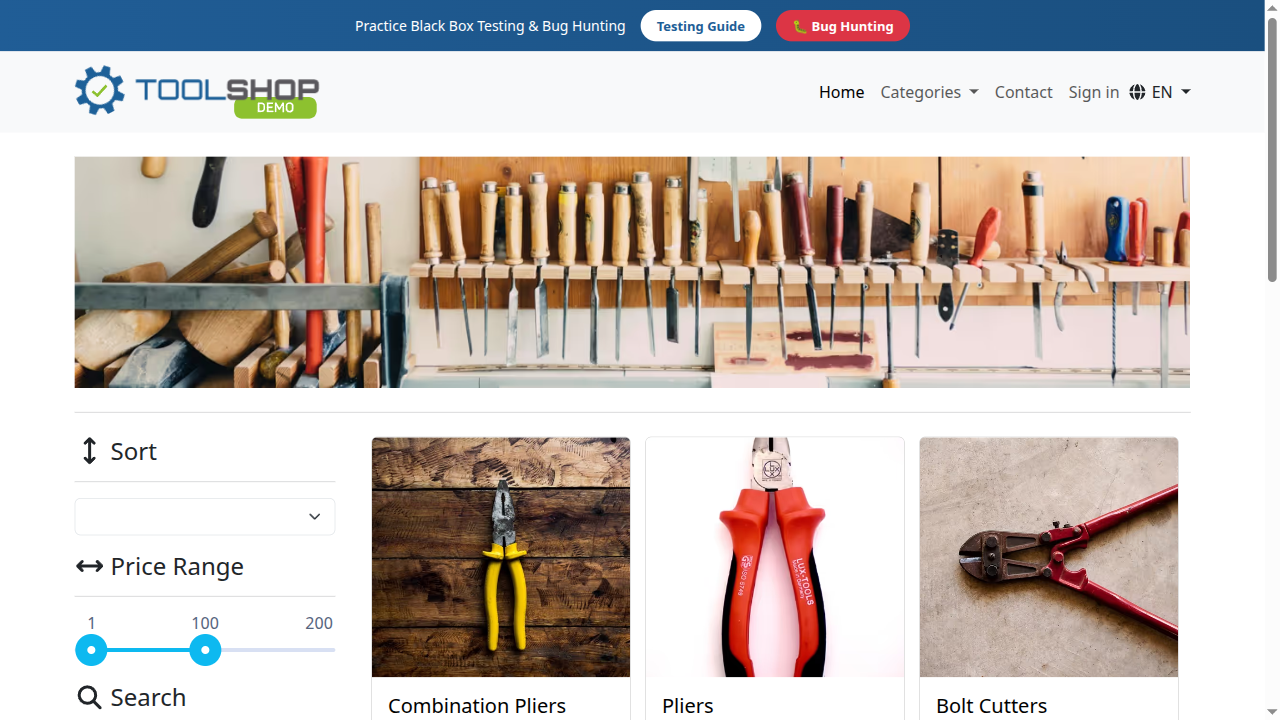

In [ ]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent autonomously to add items to the shopping cart and print the complete result.

In [ ]:
# Execute the task autonomously
result = await agent.execute(
    "add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to the cart",
    max_steps=10
)

# Print the complete task result
print(result)


Task Result: ✓ COMPLETED

Message: Successfully added 2 Flat-Head Wood Screws and 5 Cross-head screws to the cart, and the current page is the checkout cart page, confirming all task requirements are met.
Total steps: 5

────────────────────────────────────────────────────────────
Step-by-step execution:
────────────────────────────────────────────────────────────

Step 1:
  Message: Filtering products by 'Fasteners' to find the required screws.
  Actions:
    1. click(element_id=input-19) - Click the 'Fasteners' checkbox to filter products.
       Result: ✓ Success

Step 2:
  Message: Clicking on 'Flat-Head Wood Screws' to view its details and add to cart. After this, I will return to this page to add 'Cross-head screws'.
  Actions:
    1. click(element_id=a-8) - Click on 'Flat-Head Wood Screws' to add 2 to the cart.
       Result: ✓ Success

Step 3:
  Message: Setting the quantity for 'Flat-Head Wood Screws' to 2 and adding it to the cart. Next, I will navigate to the 'Cross-head sc

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


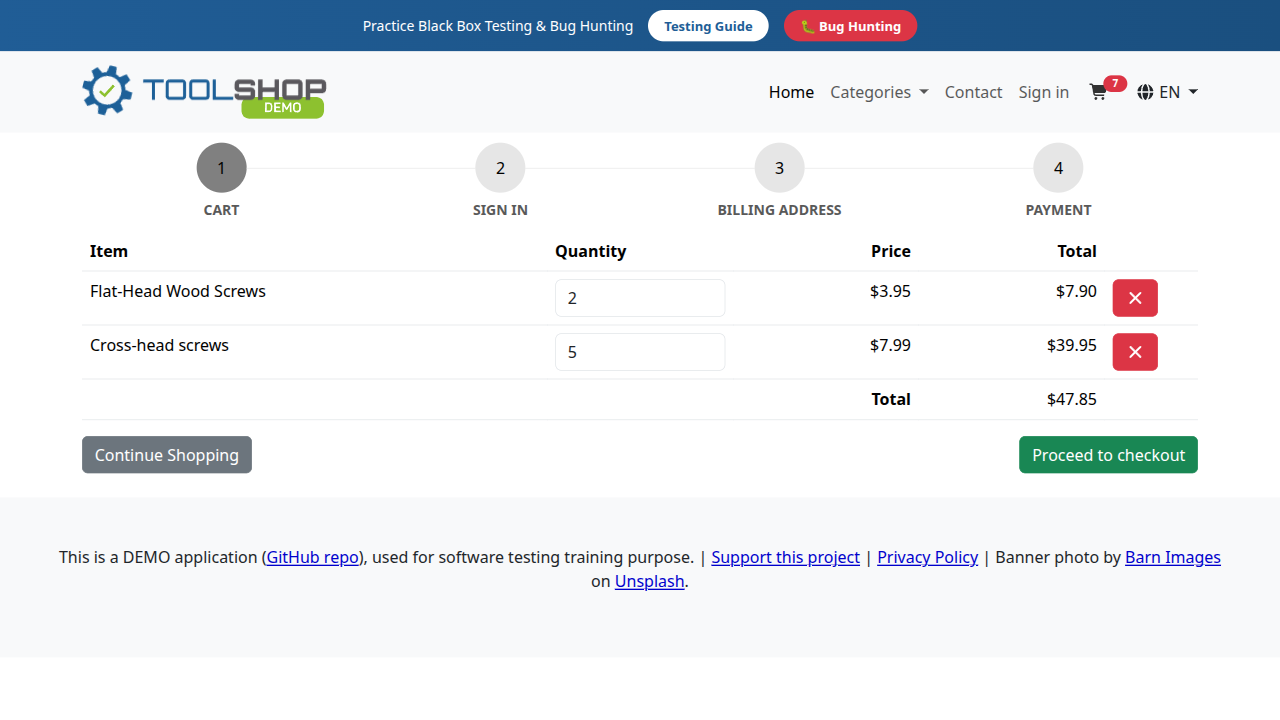

In [ ]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))